<a href="https://colab.research.google.com/github/Vivacity5X/Disease-Predictor/blob/main/diseasepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"chaitanya3453223","key":"15daa810ea66d2d4a4ee0e5c67c78a61"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease-data --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 34.8MB/s]


In [5]:
import pandas as pd
df = pd.read_csv('/content/heart-disease-data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [8]:
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mean())

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

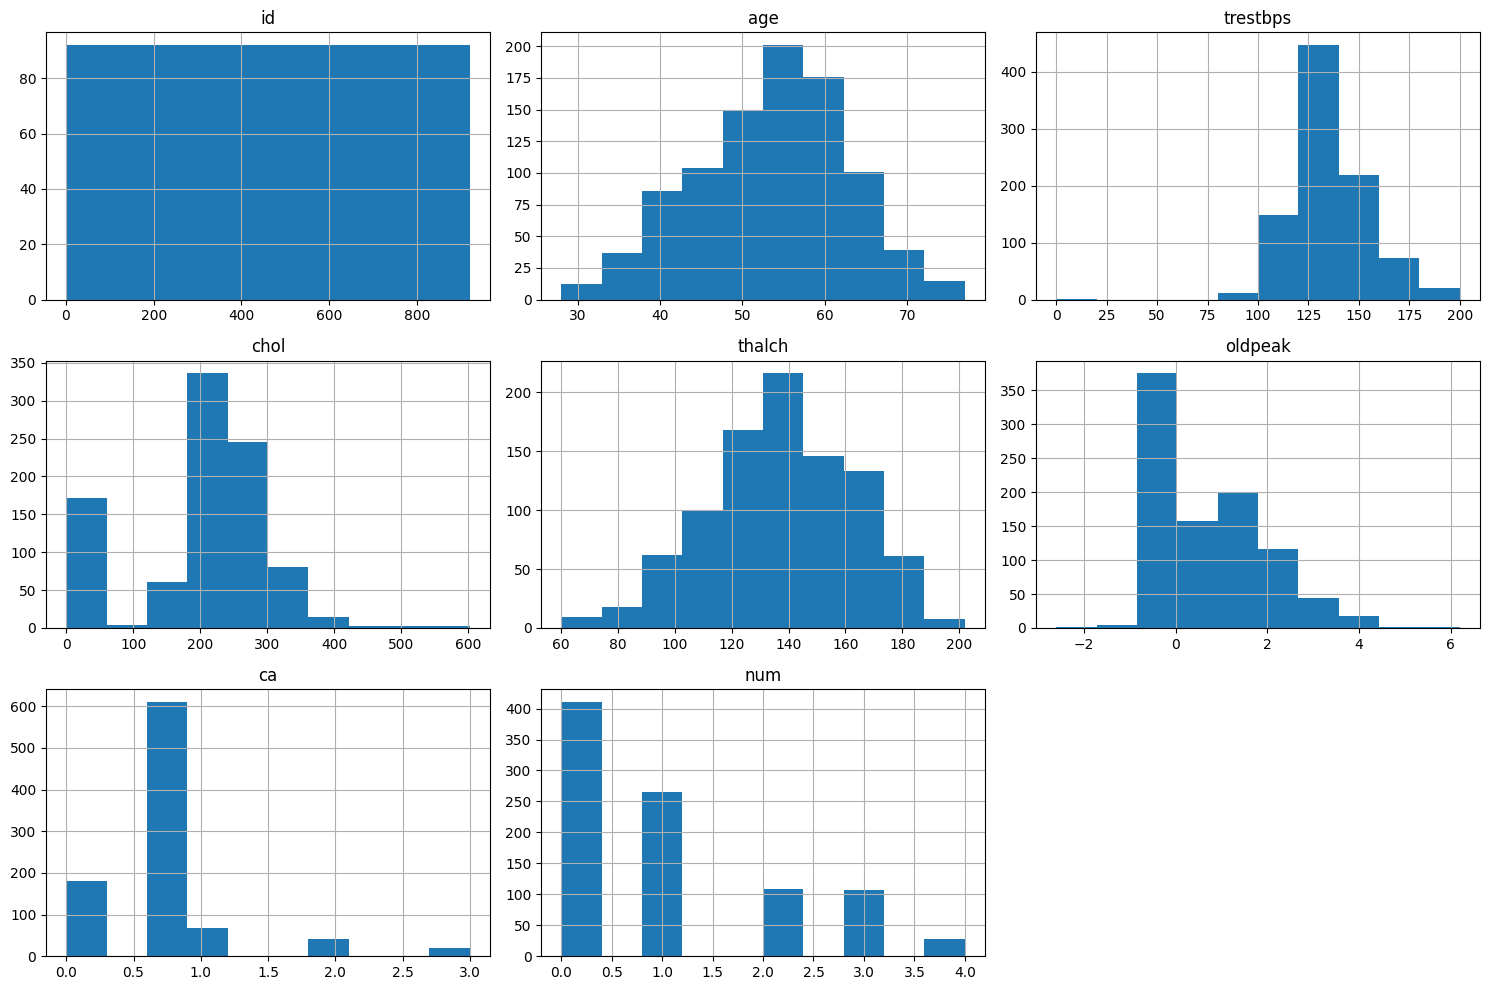

In [10]:
df[numerical_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

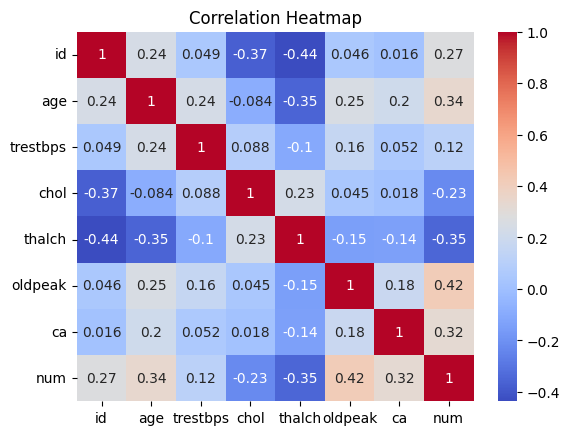

In [11]:
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

In [13]:
X=df.drop('num',axis=1)
y=(df['num']>0).astype(int)

In [14]:
X=pd.get_dummies(X,columns=cat_cols)
print("Final feature columns:",X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [15]:
# ** Train/split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

new value = (x-mean)/S.D.

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

Mode Evaluation

In [19]:
from sklearn.metrics import accuracy_score,classification_report

In [20]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Reg Accu: ",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Reg Accu:  0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [21]:
from sklearn.metrics import confusion_matrix

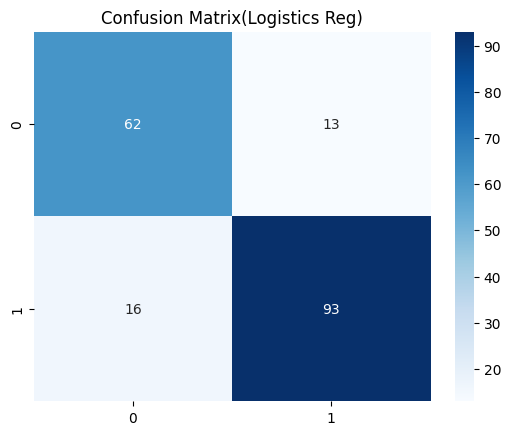

In [22]:
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues')
plt.title('Confusion Matrix(Logistics Reg)')
plt.show()

Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)


In [25]:
print("Random Forest Accu: ",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accu:  0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



feature importance

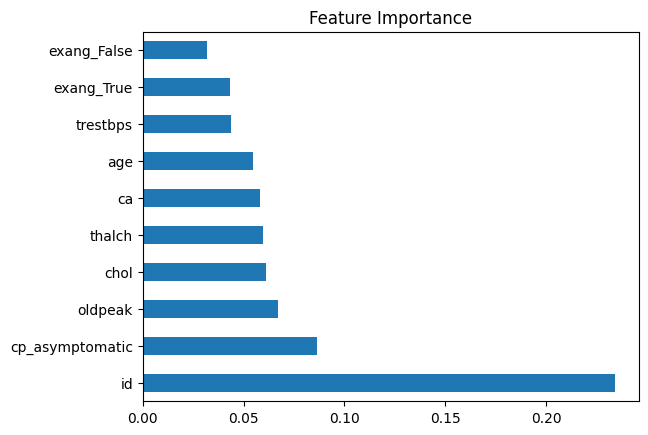

In [26]:
feat_imp = pd.Series(rf_model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Svae model

In [27]:
import joblib
joblib.dump(rf_model,'heart_rf_model.pkl')


['heart_rf_model.pkl']

In [28]:
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [29]:
sample = X.head(1)
sample.to_csv('heart_user_template.csv',index=False)
print("User template saved as 'heart_user_template.csv' ")

User template saved as 'heart_user_template.csv' 


In [30]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset (1).csv


{'heart_dataset (1).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\r\n58,130,220,1,normal,150,FALSE,1.4,flat,0,fixed defect,0,1,0,0,0,1\r\n67,160,276,0,lv hypertrophy,108,TRUE,1.5,flat,3,normal,0,1,1,0,0,0\r\n42,120,230,0,normal,170,FALSE,1,upsloping,0,reversable defect,1,0,0,0,1,0\r\n50,130,210,0,lv hypertrophy,158,FALSE,0.8,flat,0,normal,0,1,0,0,1,0\r\n45,114,230,0,normal,165,FALSE,1.1,downsloping,0,normal,1,0,0,1,0,0'}

In [31]:
import joblib
import pandas as pd
user_df = pd.read_csv('heart_dataset.csv')
#get col list
numerical_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bools_cols = df.select_dtypes(include='bool').columns.tolist()
#droping
numerical_cols = [col for col in numerical_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bools_cols = [col for col in bools_cols if col in user_df.columns]
#missing fill val
user_df[numerical_cols] = user_df[numerical_cols].fillna(df[numerical_cols].mean())

for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

for col in bools_cols:
    user_df[col]=user_df[col].astype(int)

#one hot encoding
user_df_encoded = pd.get_dummies(user_df,columns=cat_cols)

# Align columns after one-hot encoding, filling missing columns with 0
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

#scaler
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#prediction
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

In [32]:
print(user_df[['age','chol','Heart_Disease_Prediction']].head())


   age  chol  Heart_Disease_Prediction
0   58   220                         0
1   67   276                         1
2   42   230                         0
3   50   210                         0
4   45   230                         0


In [33]:
import joblib

# Save model & scaler
joblib.dump(rf_model, "heart_rf_model.pkl")
joblib.dump(scaler, "heart_scaler.pkl")

# Save training columns
joblib.dump(list(X.columns), "model_columns.pkl")

print("✅ Model, scaler, and columns saved!")


✅ Model, scaler, and columns saved!


In [34]:
!pip install streamlit

In [35]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import joblib

# Load model, scaler, and training columns
model = joblib.load("heart_rf_model.pkl")
scaler = joblib.load("heart_scaler.pkl")
model_columns = joblib.load("model_columns.pkl")

st.set_page_config(page_title="Heart Disease Prediction", layout="wide")
st.title("❤️ Heart Disease Prediction App")

st.sidebar.header("Patient Information")

# Demo Mode toggle
demo_mode = st.sidebar.checkbox("Enable Demo Mode", value=True)

if demo_mode:
    # Pre-filled example patient
    age = 55
    sex = "Male"
    cp = "asymptomatic"
    trestbps = 145
    chol = 250
    fbs = "Yes"
    restecg = "abnormal"
    thalach = 140
    exang = "Yes"
    oldpeak = 2.5
    slope = "flat"
    ca = 1
    thal = "reversible defect"
    st.sidebar.info("🎬 Demo Mode enabled: Using sample patient data")
else:
    # Manual input
    age = st.sidebar.number_input("Age", 20, 100, 45)
    sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
    cp = st.sidebar.selectbox("Chest Pain Type", ["typical angina", "atypical angina", "non-anginal", "asymptomatic"])
    trestbps = st.sidebar.number_input("Resting Blood Pressure", 80, 200, 120)
    chol = st.sidebar.number_input("Cholesterol (mg/dl)", 100, 600, 200)
    fbs = st.sidebar.selectbox("Fasting Blood Sugar > 120 mg/dl", ["Yes", "No"])
    restecg = st.sidebar.selectbox("Resting ECG", ["normal", "abnormal", "hypertrophy"])
    thalach = st.sidebar.number_input("Max Heart Rate", 60, 220, 150)
    exang = st.sidebar.selectbox("Exercise Induced Angina", ["Yes", "No"])
    oldpeak = st.sidebar.number_input("ST Depression (oldpeak)", 0.0, 6.0, 1.0, step=0.1)
    slope = st.sidebar.selectbox("Slope", ["upsloping", "flat", "downsloping"])
    ca = st.sidebar.number_input("Number of Major Vessels (0–3)", 0, 3, 0)
    thal = st.sidebar.selectbox("Thalassemia", ["normal", "fixed defect", "reversible defect"])

# Create input dataframe
input_data = pd.DataFrame({
    "age": [age],
    "sex": [sex],
    "cp": [cp],
    "trestbps": [trestbps],
    "chol": [chol],
    "fbs": [fbs],
    "restecg": [restecg],
    "thalach": [thalach],
    "exang": [exang],
    "oldpeak": [oldpeak],
    "slope": [slope],
    "ca": [ca],
    "thal": [thal]
})

# One-hot encode
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
input_encoded = pd.get_dummies(input_data, columns=cat_cols)

# Align with training columns
input_encoded = input_encoded.reindex(columns=model_columns, fill_value=0)

# Scale
input_scaled = scaler.transform(input_encoded)

# Predict
prediction = model.predict(input_scaled)[0]
result = "⚠️ At Risk" if prediction == 1 else "✅ Healthy"

st.subheader("Prediction Result")
st.success(f"The patient is predicted as: **{result}**")


Overwriting streamlit_app.py


In [36]:
!pip install streamlit cloudflared -q


In [37]:
!streamlit run streamlit_app.py &>/content/logs.txt &
!cloudflared tunnel --url http://localhost:8501


2025-08-27T17:49:41Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-08-27T17:49:41Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-08-27T17:49:44Z INF +--------------------------------------------------------------------------------------------+
2025-08-27T17:49:44Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-08-27T17:49:44Z INF |  https://turbo-unions-motel-exact.trycloudflare.com   